In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/netflix_titles_2021 - netflix_titles_2021.csv')

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df = df.copy()

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Adding a Audience Category for better understanding of Rating

In [ ]:
rating_to_audience_mapping = {
    'PG-13': 'Teens',
    'TV-MA': 'Mature Audience',
    'PG': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Parental Guidance',
    'TV-Y': 'General Audience',
    'TV-Y7': 'Teens',
    'R': 'Mature Audience',
    'TV-G': 'General Audience',
    'G': 'General Audience',
    'NC-17': 'Mature Audience',
    'unknown': 'Parental Guidance',
    'NR': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'UR': 'Mature Guidance'
}

# Add a new column 'audience_category' based on the mapping
df['audience_category'] = df['rating'].map(rating_to_audience_mapping)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Mature Audience
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Teens
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Mature Audience
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Teens


In [ ]:
df.groupby('rating')['rating'].count()

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: rating, dtype: int64

In [ ]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Mature Audience
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,Parental Guidance
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,Parental Guidance
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,Teens
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",Teens
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,General Audience
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",Teens
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Mature Audience
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Mature Audience
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Teens


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience


In [ ]:
df_error = df[df['date_added'].dt.year < df['release_year']]
df.drop(df_error.index, inplace=True)

In [ ]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,NaN


In [ ]:
df.loc[df['director'] == 'Louis C.K.' , 'duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,NaN


In [ ]:
df.loc[df['director'] == 'Louis C.K.' , 'rating'] = 'unknown'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unknown,66 min,Movies,The comic puts his trademark hilarious/thought...,NaN


In [ ]:
new_df = df[df['type'] == 'Movie']

## Making New df for Movies and TV Shows separatly because we cannot calculate the duration of TV shows

In [ ]:
new_df['duration'] = new_df['duration'].str.replace(' min', '').astype(int)
total_minutes = new_df['duration'].sum()
print(total_minutes)

610258


<ipython-input-161-1a8f4edecbd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['duration'] = new_df['duration'].str.replace(' min', '').astype(int)


In [ ]:
new_df_TV = df[df['type'] == 'TV Show']

Replacing Seasons from duration

In [ ]:
new_df_TV['duration'] = new_df_TV['duration'].str.replace(' Seasons?$', '', regex=True).astype(int)
total_minutes = new_df_TV['duration'].sum()
print(total_minutes)

4691


<ipython-input-163-cbf029dd847d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_TV['duration'] = new_df_TV['duration'].str.replace(' Seasons?$', '', regex=True).astype(int)


In [ ]:
sample_data = df['director'].iloc[5]
sample_data

'Mike Flanagan'

In [ ]:
def convert_to_list(string):
  lst = []
  lst = string.split(', ')
  return lst

In [ ]:
l = convert_to_list(sample_data)
l

['Mike Flanagan']

In [ ]:
df.fillna({'rating':'unkown','cast':'unknown', 'country': 'unknown', 'director': 'unknown'}, inplace=True)
df.isna().sum()

show_id               0
type                  0
title                 0
director              0
cast                  0
country               0
date_added           10
release_year          0
rating                0
duration              0
listed_in             0
description           0
audience_category     7
dtype: int64

In [ ]:
df['cast'] = df['cast'].apply(convert_to_list)
df['director'] = df['director'].apply(convert_to_list)
df['country'] = df['country'].apply(convert_to_list)
df['listed_in'] = df['listed_in'].apply(convert_to_list)
df['rating'] = df['rating'].replace('unkown', 'unknown')
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
0,s1,Movie,dick johnson is dead,[Kirsten Johnson],[unknown],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"as her father nears the end of his life, filmm...",Teens
1,s2,TV Show,blood & water,[unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","after crossing paths at a party, a cape town t...",Mature Audience
2,s3,TV Show,ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[unknown],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",to protect his family from a powerful drug lor...,Mature Audience
3,s4,TV Show,jailbirds new orleans,[unknown],[unknown],[unknown],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","feuds, flirtations and toilet talk go down amo...",Mature Audience
4,s5,TV Show,kota factory,[unknown],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",in a city of coaching centers known to train i...,Mature Audience
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","a political cartoonist, a crime reporter and a...",Mature Audience
8803,s8804,TV Show,zombie dumb,[unknown],[unknown],[unknown],2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","while living alone in a spooky town, a young g...",Teens
8804,s8805,Movie,zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",looking to survive in a world taken over by zo...,Mature Audience
8805,s8806,Movie,zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","dragged from civilian life, a former superhero...",Teens


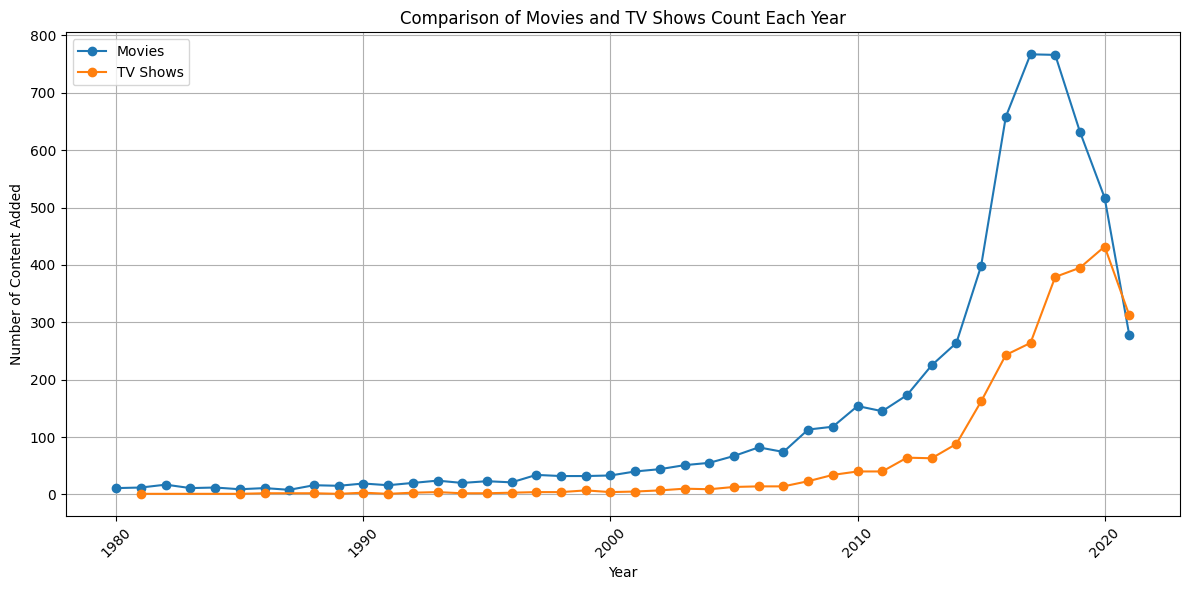

In [ ]:
movies_count = new_df[new_df['release_year'] >= 1980]['release_year'].value_counts().sort_index()
tv_shows_count = new_df_TV[new_df_TV['release_year'] >= 1980]['release_year'].value_counts().sort_index()
# Plot the comparison between TV shows and movies count each year
plt.figure(figsize=(12, 6))
plt.plot(movies_count.index, movies_count.values, marker='o', label='Movies')
plt.plot(tv_shows_count.index, tv_shows_count.values, marker='o', label='TV Shows')
plt.title('Comparison of Movies and TV Shows Count Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

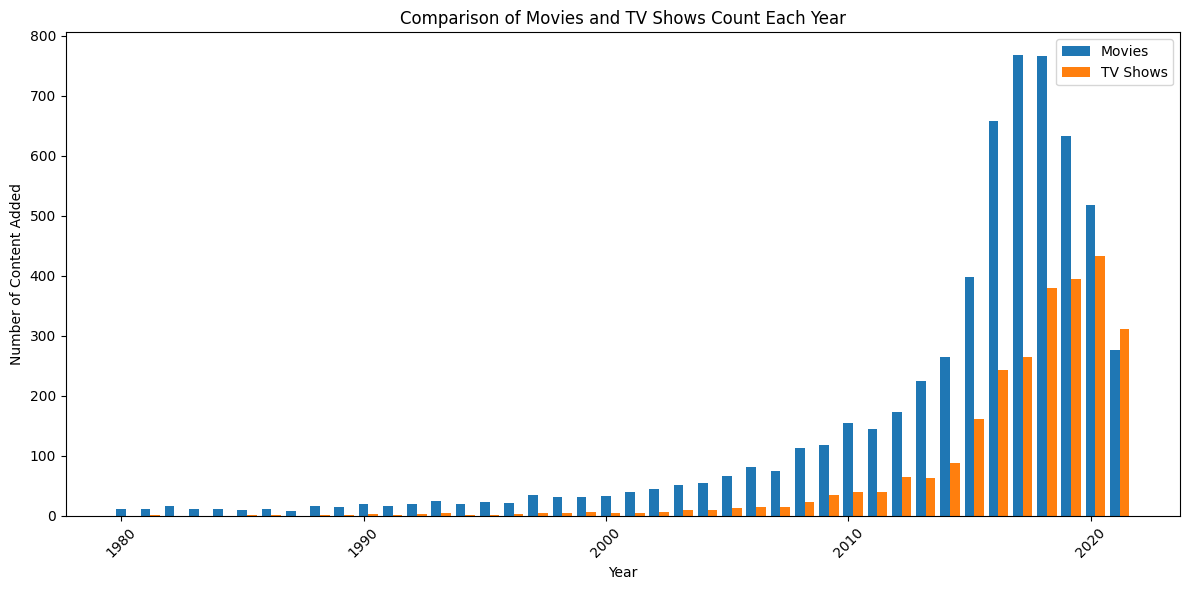

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(movies_count.index, movies_count.values, width=0.4, label='Movies', align='center')
plt.bar(tv_shows_count.index + 0.4, tv_shows_count.values, width=0.4, label='TV Shows', align='center')
plt.title('Comparison of Movies and TV Shows Count Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyze the distribution of content across different rating categories. Are certain rating categories more prevalent than others?

In [ ]:
rating_distribution = new_df['rating'].value_counts()

# Plot the distribution of content across different rating categories
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Across Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

NameError: name 'new_df' is not defined

In [ ]:
df['show_id'].nunique()

8793

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8793 non-null   object        
 1   type               8793 non-null   object        
 2   title              8793 non-null   object        
 3   director           8793 non-null   object        
 4   cast               8793 non-null   object        
 5   country            8793 non-null   object        
 6   date_added         8783 non-null   datetime64[ns]
 7   release_year       8793 non-null   int64         
 8   rating             8793 non-null   object        
 9   duration           8793 non-null   object        
 10  listed_in          8793 non-null   object        
 11  description        8793 non-null   object        
 12  audience_category  8786 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 1.2+ MB


**Analyze how the popularity of different genres (listed_in) has changed over time. Are there genres that have become more or less prevalent in recent years?**

<Figure size 1200x800 with 0 Axes>

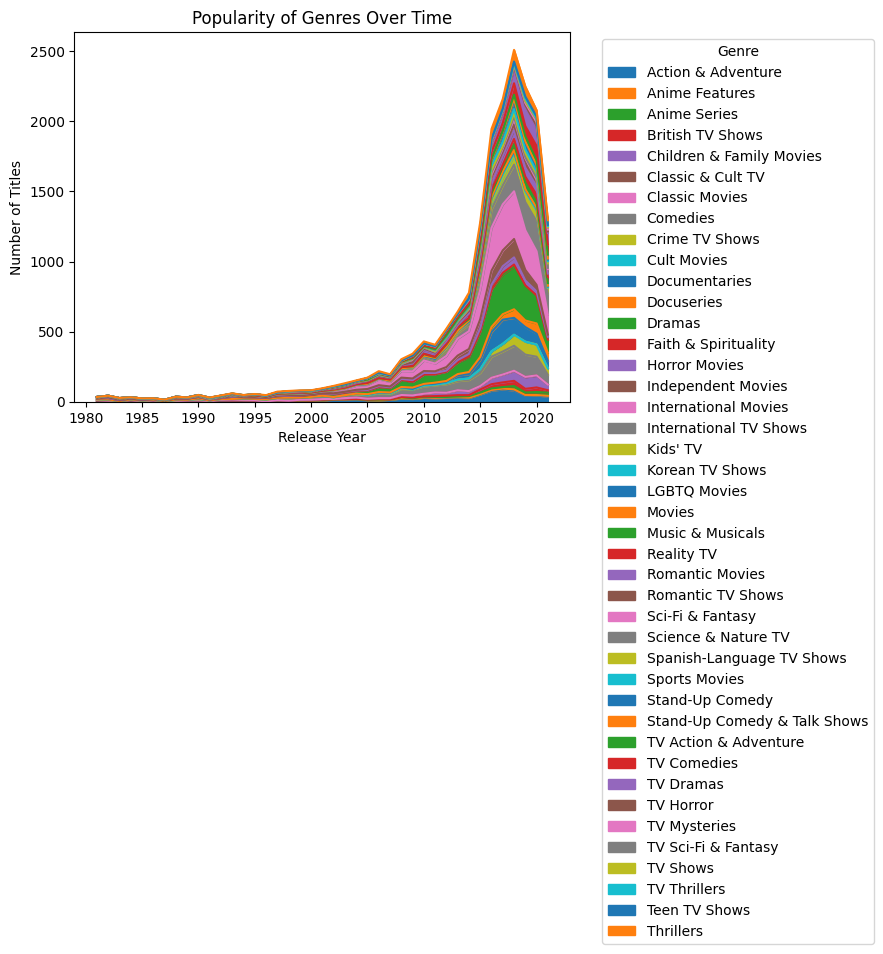

In [ ]:
GenrePlot=df[df['release_year']>1980].copy()

# Explode the lists into separate rows
df_exploded = GenrePlot.explode('listed_in')

# Group the data by release year and listed_in genres
grouped = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Pivot the data to have years as rows and genres as columns
pivot_table = grouped.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

# Plotting the trends for each genre
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='area', stacked=True)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Explore any potential relationship between content duration and its average rating.**

<ipython-input-174-f818273604c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_ratings['duration'] = duration_ratings['duration'].str.extract('(\d+)', expand=False).astype(float)


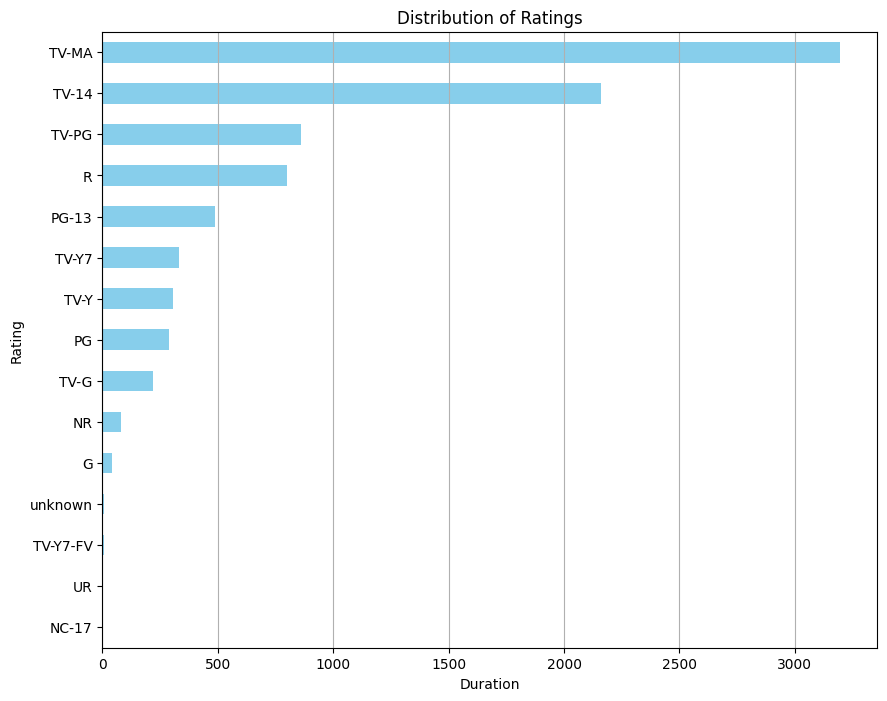

In [ ]:
duration_ratings=new_df.copy()
duration_ratings = new_df[['duration', 'rating']]
duration_ratings = df[['duration', 'rating']]
duration_ratings = df[['duration', 'rating']]

# Convert duration to numeric format (assuming it's in the format 'X min')
duration_ratings['duration'] = duration_ratings['duration'].str.extract('(\d+)', expand=False).astype(float)

# Count occurrences of each rating and sort by value counts in ascending order
rating_counts = duration_ratings['rating'].value_counts().sort_values(ascending=True)

# Plotting the distribution of ratings
plt.figure(figsize=(10, 8))
rating_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.grid(axis='x')
plt.show()

In [ ]:
rating_counts

rating
NC-17          3
UR             3
TV-Y7-FV       6
unknown        7
G             41
NR            80
TV-G         220
PG           287
TV-Y         306
TV-Y7        333
PG-13        490
R            799
TV-PG        862
TV-14       2159
TV-MA       3197
Name: count, dtype: int64

***Top 10 Cast Members with the count of appereance ***

In [ ]:
# Flatten the list of lists in the 'cast' column and convert it into a list
all_cast = [cast_member for sublist in df['cast'] for cast_member in sublist]

# Count the occurrences of each cast member
cast_appearances = {}
for cast_member in all_cast:
    cast_appearances[cast_member] = cast_appearances.get(cast_member, 0) + 1
# Sort the dictionary by values in descending order
sorted_cast_appearances = sorted(cast_appearances.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 cast members with the highest count of appearances
print("Top 10 Cast Members with Highest Appearances:")
for cast_member, count in sorted_cast_appearances[:10]:
    print(f"{cast_member}: {count}")

Top 10 Cast Members with Highest Appearances:
unknown: 825
Anupam Kher: 43
Shah Rukh Khan: 35
Julie Tejwani: 33
Naseeruddin Shah: 32
Takahiro Sakurai: 32
Rupa Bhimani: 31
Akshay Kumar: 30
Om Puri: 30
Yuki Kaji: 29


**Analyze whether certain cast members tend to appear more frequently in specific genres or content types.**

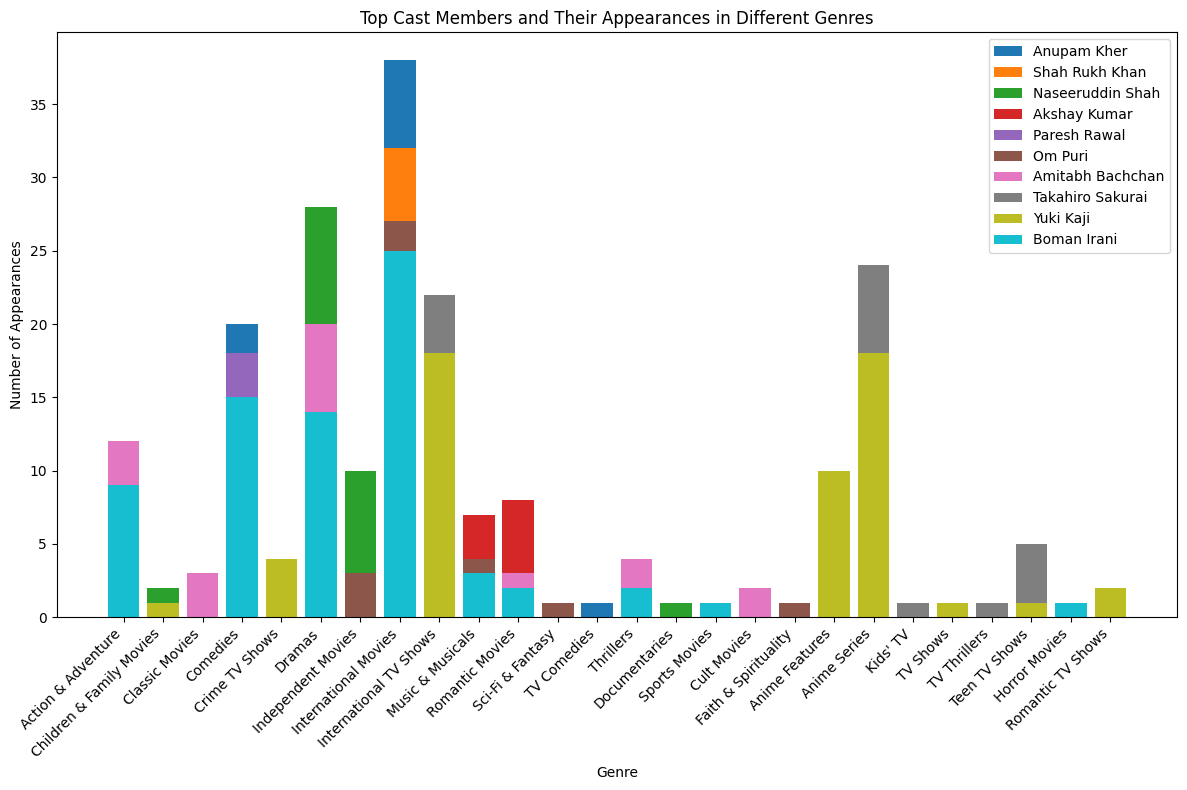

In [ ]:
dfs = []

# Iterate over each row
for index, row in df.iterrows():
    # Iterate over each cast member
    for cast_member in row['cast']:
        # Check if the cast member is not "unknown"
        if cast_member != 'unknown':
            # Iterate over each genre
            for genre in row['listed_in']:
                # Create a DataFrame for each row and append it to the list
                dfs.append(pd.DataFrame({'cast': [cast_member], 'genre': [genre], 'type': [row['type']]}))

# Concatenate all DataFrames in the list
cast_genre_content = pd.concat(dfs, ignore_index=True)

# Group the data by cast member and genre, and count the occurrences
cast_genre_count = cast_genre_content.groupby(['cast', 'genre']).size().reset_index(name='count')

# Filter the top cast members with the highest total appearances
top_cast_members = cast_genre_count.groupby('cast')['count'].sum().nlargest(10).index

# Plot the top cast members and their appearances in different genres
plt.figure(figsize=(12, 8))
for cast_member in top_cast_members:
    data = cast_genre_count[cast_genre_count['cast'] == cast_member]
    plt.bar(data['genre'], data['count'], label=cast_member)

plt.title('Top Cast Members and Their Appearances in Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Exploring whether specific directors are associated with particular genres or content types.**

In [ ]:
from itertools import product
ddfs = []

# Iterate over each row
for index, row in df.iterrows():
    # Check if the director is not 'unknown'
    if 'unknown' not in row['director']:
        # Create all possible combinations of directors and genres
        director_genre_combinations = list(product(row['director'], row['listed_in']))

        # Iterate over each combination
        for director, genre in director_genre_combinations:
            # Create a DataFrame for each combination and append it to the list
            ddfs.append(pd.DataFrame({'director': [director], 'genre': [genre], 'type': [row['type']]}))

# Concatenate all DataFrames in the list
director_genre_content = pd.concat(ddfs, ignore_index=True)

# Group the data by director and genre, and count the occurrences
director_genre_count = director_genre_content.groupby(['director', 'genre']).size().reset_index(name='count')

# Print the top directors and their associations with different genres
print("Top Directors and Their Associations with Different Genres:")
print(director_genre_count.sort_values(by='count', ascending=False).head(10))

Top Directors and Their Associations with Different Genres:
                  director                     genre  count
8966         Rajiv Chilaka  Children & Family Movies     22
4550             Jan Suter           Stand-Up Comedy     21
9104           Raúl Campos           Stand-Up Comedy     19
10730          Suhas Kadav  Children & Family Movies     16
6814          Marcus Raboy           Stand-Up Comedy     15
4672             Jay Karas           Stand-Up Comedy     14
1839   Cathy Garcia-Molina      International Movies     13
11943      Youssef Chahine                    Dramas     12
4663           Jay Chapman           Stand-Up Comedy     12
11945      Youssef Chahine      International Movies     10


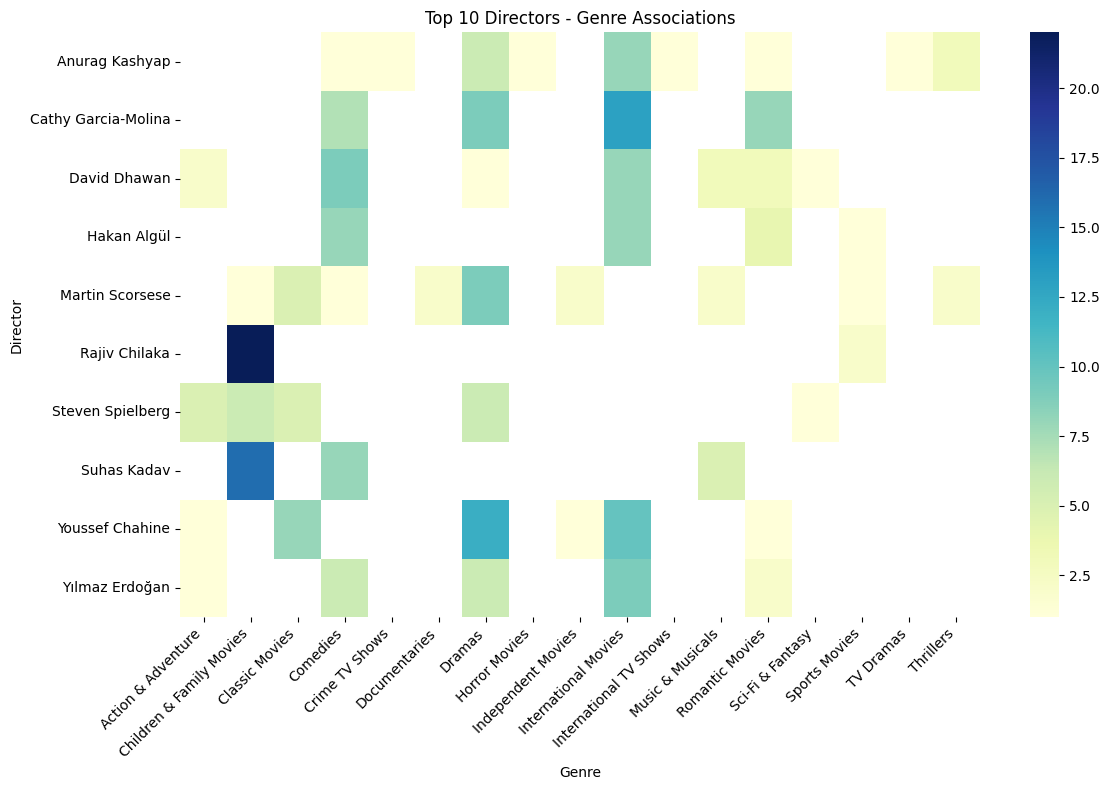

In [ ]:
director_genre_count_filtered = director_genre_count[director_genre_count['director'] != 'unknown']

# Get the top 10 directors
top_directors = director_genre_count_filtered.groupby('director')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 directors
director_genre_count_top10 = director_genre_count_filtered[director_genre_count_filtered['director'].isin(top_directors)]

# Pivot the DataFrame to have directors as rows, genres as columns, and count as values
director_genre_pivot = director_genre_count_top10.pivot(index='director', columns='genre', values='count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(director_genre_pivot, cmap='YlGnBu', linewidths=0.)
plt.title('Top 10 Directors - Genre Associations')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('cleaned_data.csv')

Country Wise Genre distribution

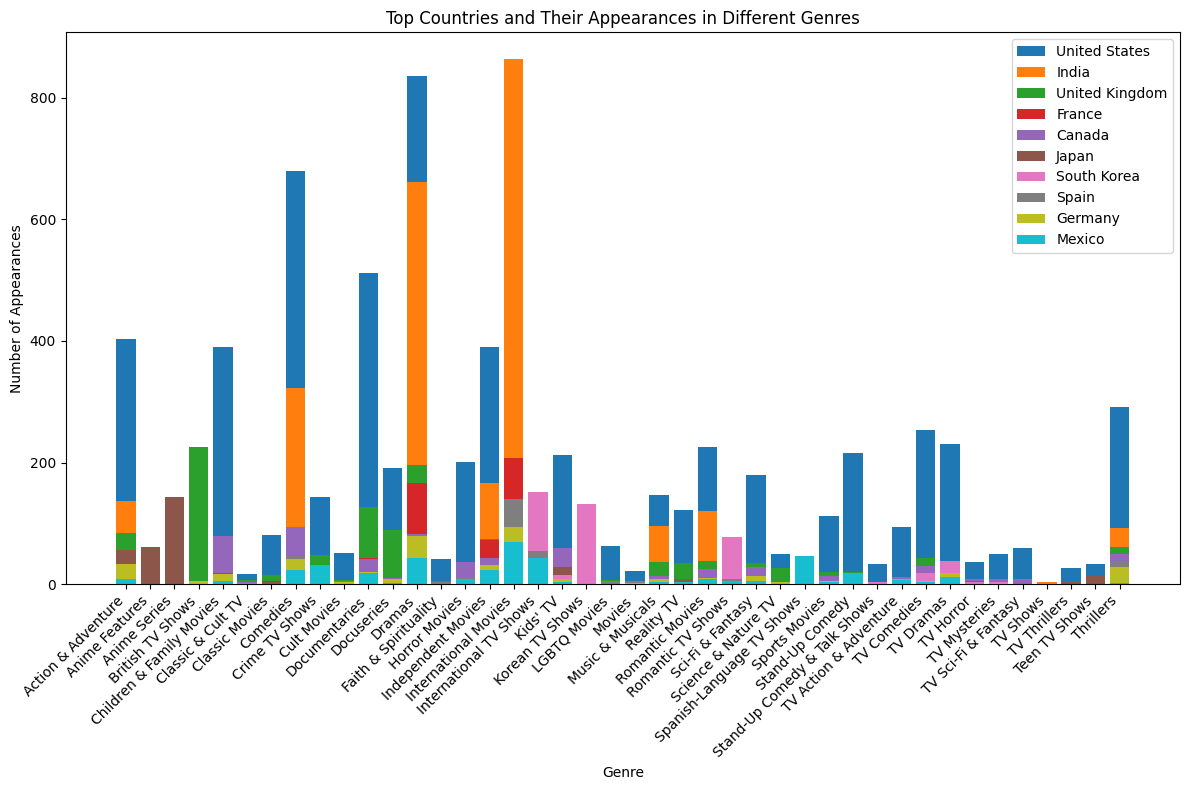

In [ ]:
dffs = []

# Iterate over each row
for index, row in df.iterrows():
    # Iterate over each country in the list
    for country in row['country']:
        # Check if the country is not "unknown"
        if country != 'unknown':
            # Iterate over each genre
            for genre in row['listed_in']:
                # Create a DataFrame for each row and append it to the list
                dffs.append(pd.DataFrame({'country': [country], 'genre': [genre], 'type': [row['type']]}))

# Concatenate all DataFrames in the list
country_genre_content = pd.concat(dffs, ignore_index=True)

# Group the data by country and genre, and count the occurrences
country_genre_count = country_genre_content.groupby(['country', 'genre']).size().reset_index(name='count')

# Filter the top countries with the highest total appearances
top_countries = country_genre_count.groupby('country')['count'].sum().nlargest(10).index

# Plot the top countries and their appearances in different genres
plt.figure(figsize=(12, 8))
for country in top_countries:
    data = country_genre_count[country_genre_count['country'] == country]
    plt.bar(data['genre'], data['count'], label=country)

plt.title('Top Countries and Their Appearances in Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


16. Analyze the co-occurrence of different genres within the listed_in category. Are there genres that frequently appear together, suggesting potential hybrid genres or subgenres?


In [ ]:
from itertools import combinations
df_genre = df.copy()
genre = (df_genre['listed_in'].explode().unique()).tolist()
genre_list = []

genre_list_1 = combinations(genre,1)
genre_list_2 = combinations(genre,2)
genre_list_3 = combinations(genre,3)
genre_list.extend(genre_list_1)
genre_list.extend(genre_list_2)
genre_list.extend(genre_list_3)


d = {}
for i in genre_list:
  d[tuple(i)] = df_genre['listed_in'].apply(lambda x : all(j in x for j in i)).sum()

df_pair = pd.DataFrame.from_dict(d, orient='index', columns=['Count']).reset_index()
df_pair.columns = ['Genre', 'Count']
top_20 = df_pair.sort_values(by = 'Count' ,ascending = False).head(20)
top_20['Genre'] = top_20['Genre'].apply(lambda x: ', '.join(x))

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_20['Genre'], top_20['Count'], color='darkblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 20 Genres by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.savefig('relationBetweenGenreandCount')
plt.show()




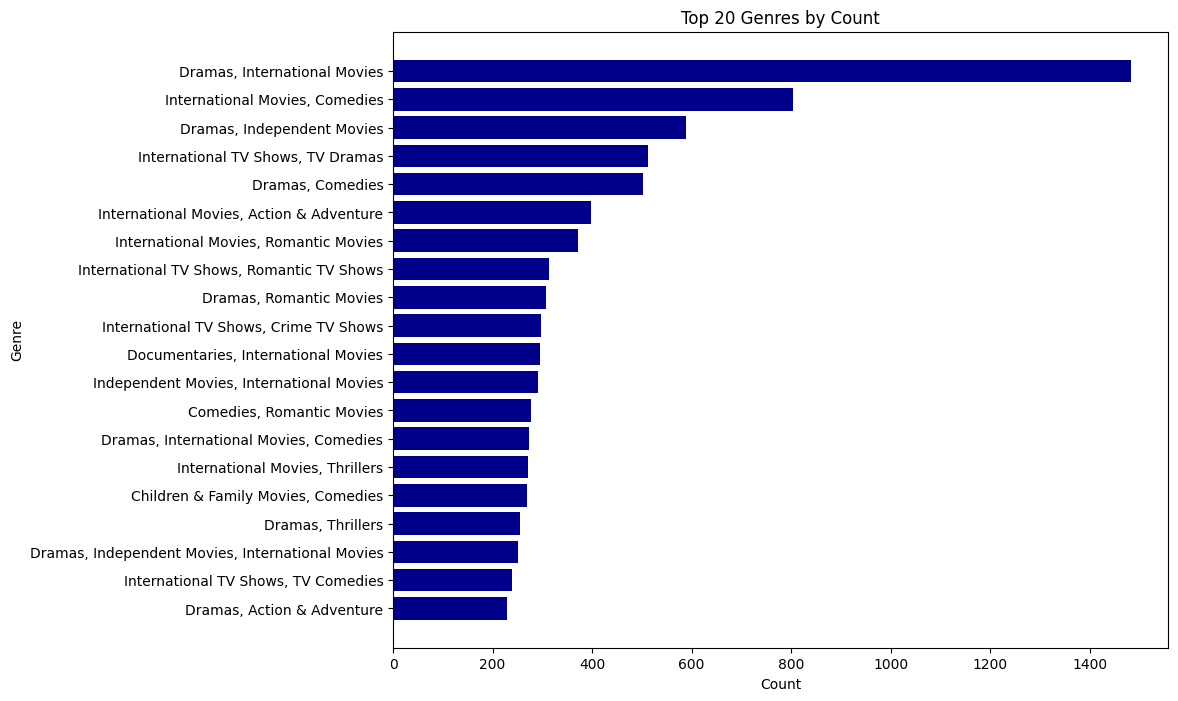

In [ ]:
from itertools import combinations
df_genre = df.copy()
genre = (df_genre['listed_in'].explode().unique()).tolist()
genre_list = []


genre_list_2 = combinations(genre,2)
genre_list_3 = combinations(genre,3)

genre_list.extend(genre_list_2)
genre_list.extend(genre_list_3)


d = {}
for i in genre_list:
  d[tuple(i)] = df_genre['listed_in'].apply(lambda x : all(j in x for j in i)).sum()

df_pair = pd.DataFrame.from_dict(d, orient='index', columns=['Count']).reset_index()
df_pair.columns = ['Genre', 'Count']
top_20 = df_pair.sort_values(by = 'Count' ,ascending = False).head(20)
top_20['Genre'] = top_20['Genre'].apply(lambda x: ', '.join(x))

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_20['Genre'], top_20['Count'], color='darkblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 20 Genres by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

17. Explore how the themes or topics of content have evolved over time based on the analysis of titles and descriptions. Are there noticeable shifts in the types of stories being told?

In [ ]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience_category
0,s1,Movie,dick johnson is dead,[Kirsten Johnson],[unknown],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"as her father nears the end of his life, filmm...",Teens
1,s2,TV Show,blood & water,[unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","after crossing paths at a party, a cape town t...",Mature Audience
2,s3,TV Show,ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[unknown],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",to protect his family from a powerful drug lor...,Mature Audience
3,s4,TV Show,jailbirds new orleans,[unknown],[unknown],[unknown],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","feuds, flirtations and toilet talk go down amo...",Mature Audience
4,s5,TV Show,kota factory,[unknown],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",in a city of coaching centers known to train i...,Mature Audience
5,s6,TV Show,midnight mass,[Mike Flanagan],"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",[unknown],2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",the arrival of a charismatic young priest brin...,Mature Audience
6,s7,Movie,my little pony: a new generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[unknown],2021-09-24,2021,PG,91 min,[Children & Family Movies],equestria's divided. but a bright-eyed hero be...,Teens
7,s8,Movie,sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","on a photo shoot in ghana, an american model s...",Mature Audience
8,s9,TV Show,the great british baking show,[Andy Devonshire],"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",[United Kingdom],2021-09-24,2021,TV-14,9 Seasons,"[British TV Shows, Reality TV]",a talented batch of amateur bakers face off in...,Teens
9,s10,Movie,the starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",[United States],2021-09-24,2021,PG-13,104 min,"[Comedies, Dramas]",a woman adjusting to life after a loss contend...,Teens


18. Compare the distribution of genres and ratings between Netflix original content and licensed content. Are there any noticeable differences in content focus or target audience?

In [ ]:
df_content = df.copy()
content_mapping = {
    True : 'netflix original content',
    False : 'licensed content'
}


df_content['content_type'] = df_content.apply(lambda x: content_mapping[x['date_added'].year == x['release_year']], axis=1)


array([<Axes: ylabel='licensed content'>,
       <Axes: ylabel='netflix original content'>], dtype=object)

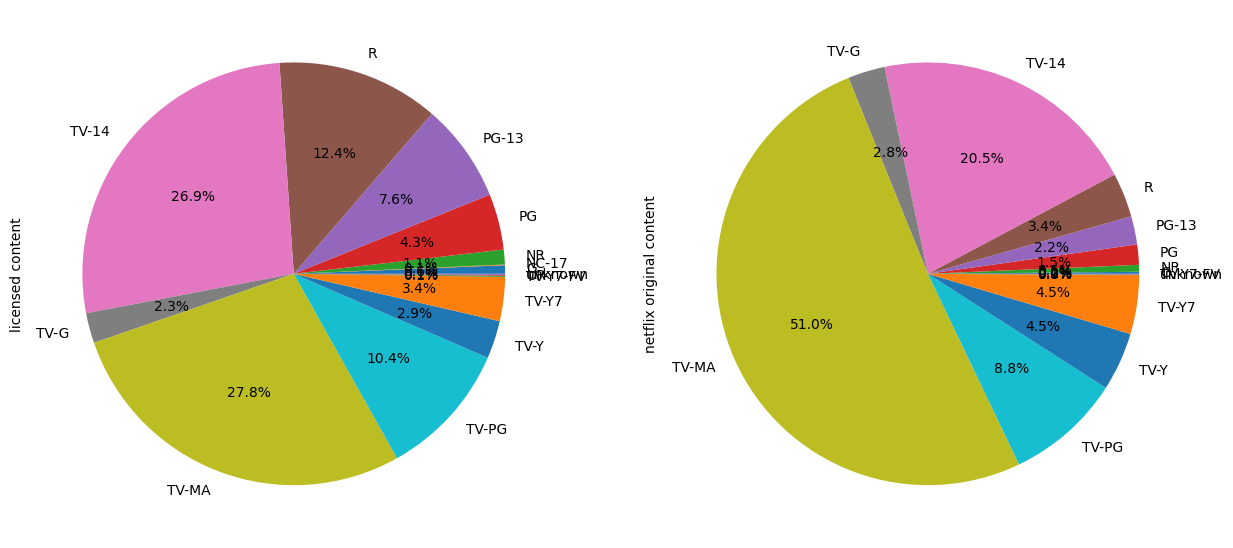

In [ ]:
df_content.groupby('rating')['content_type'].value_counts().unstack().plot(kind = 'pie', subplots = True , legend = False, autopct='%1.1f%%',figsize=(15, 10))

array([<Axes: ylabel='licensed content'>,
       <Axes: ylabel='netflix original content'>], dtype=object)

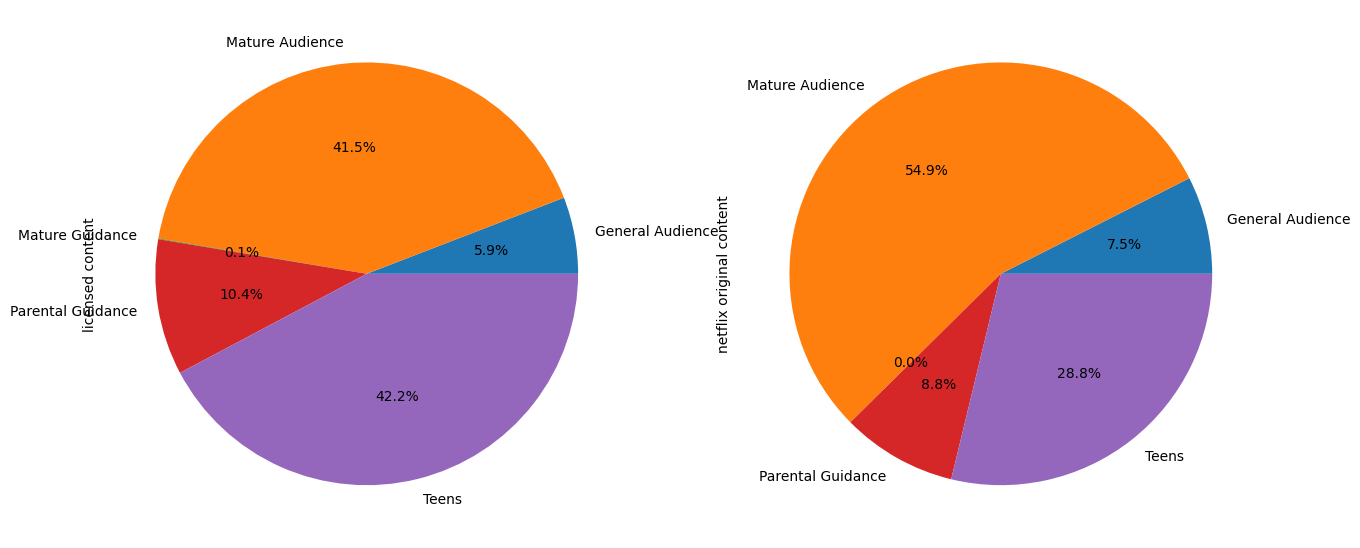

In [ ]:
df_content.groupby('audience_category')['content_type'].value_counts().unstack().plot(kind = 'pie', subplots = True , legend = False, autopct='%1.1f%%',figsize=(15, 8))


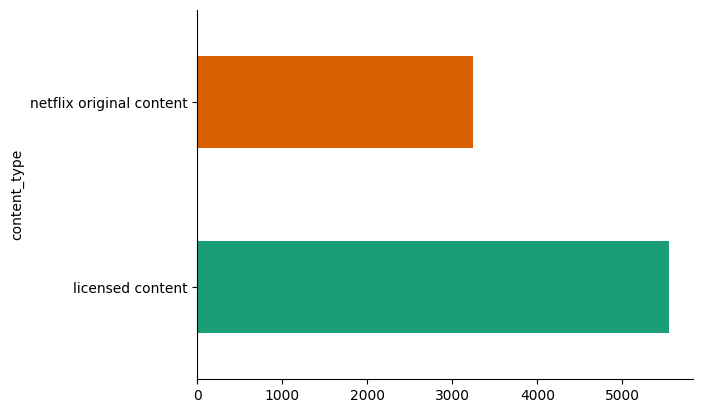

In [ ]:
df_content.groupby('content_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

19. Analyze how the diversity of content, considering genres, countries of origin, and representation, has changed over time.

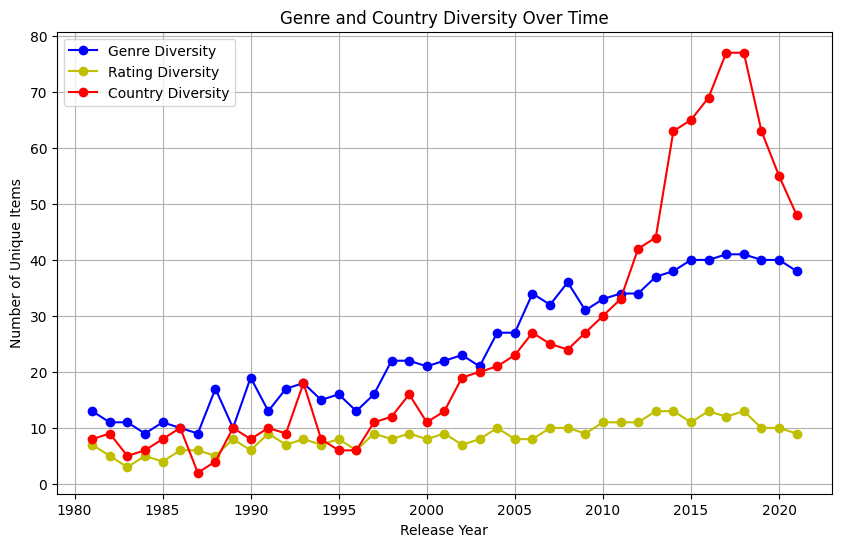

In [ ]:
df_diversity = df.copy()
df_diversity = df_diversity[df_diversity['release_year'] > 1980]
df_yearly_genre = df_diversity.groupby('release_year')['listed_in'].apply(lambda x: x.explode().nunique())
df_yearly_country = df_diversity.groupby('release_year')['country'].apply(lambda x: x.explode().nunique())
df_yearly_rating = df_diversity.groupby('release_year')['rating'].apply(lambda x: x.explode().nunique())


plt.figure(figsize=(10, 6))
plt.plot(df_yearly_genre.index, df_yearly_genre.values, marker='o', color='b', label='Genre Diversity')
plt.plot(df_yearly_rating.index, df_yearly_rating.values, marker='o', color='y', label='Rating Diversity')
plt.plot(df_yearly_country.index, df_yearly_country.values, marker='o', color='r', label='Country Diversity')

plt.title('Genre and Country Diversity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Items')
plt.legend()
plt.grid(True)
plt.show()

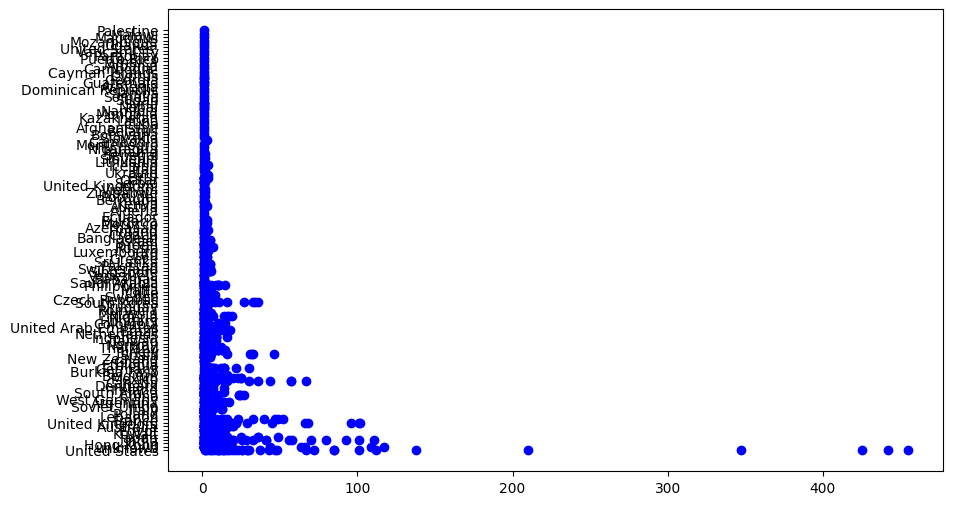

In [ ]:
x = []
y = []
for year, genres in df_diversity.items():
    x.append(year[1])
    y.append(genres)
plt.figure(figsize=(10, 6))
plt.scatter(y, x, marker='o', color='b')

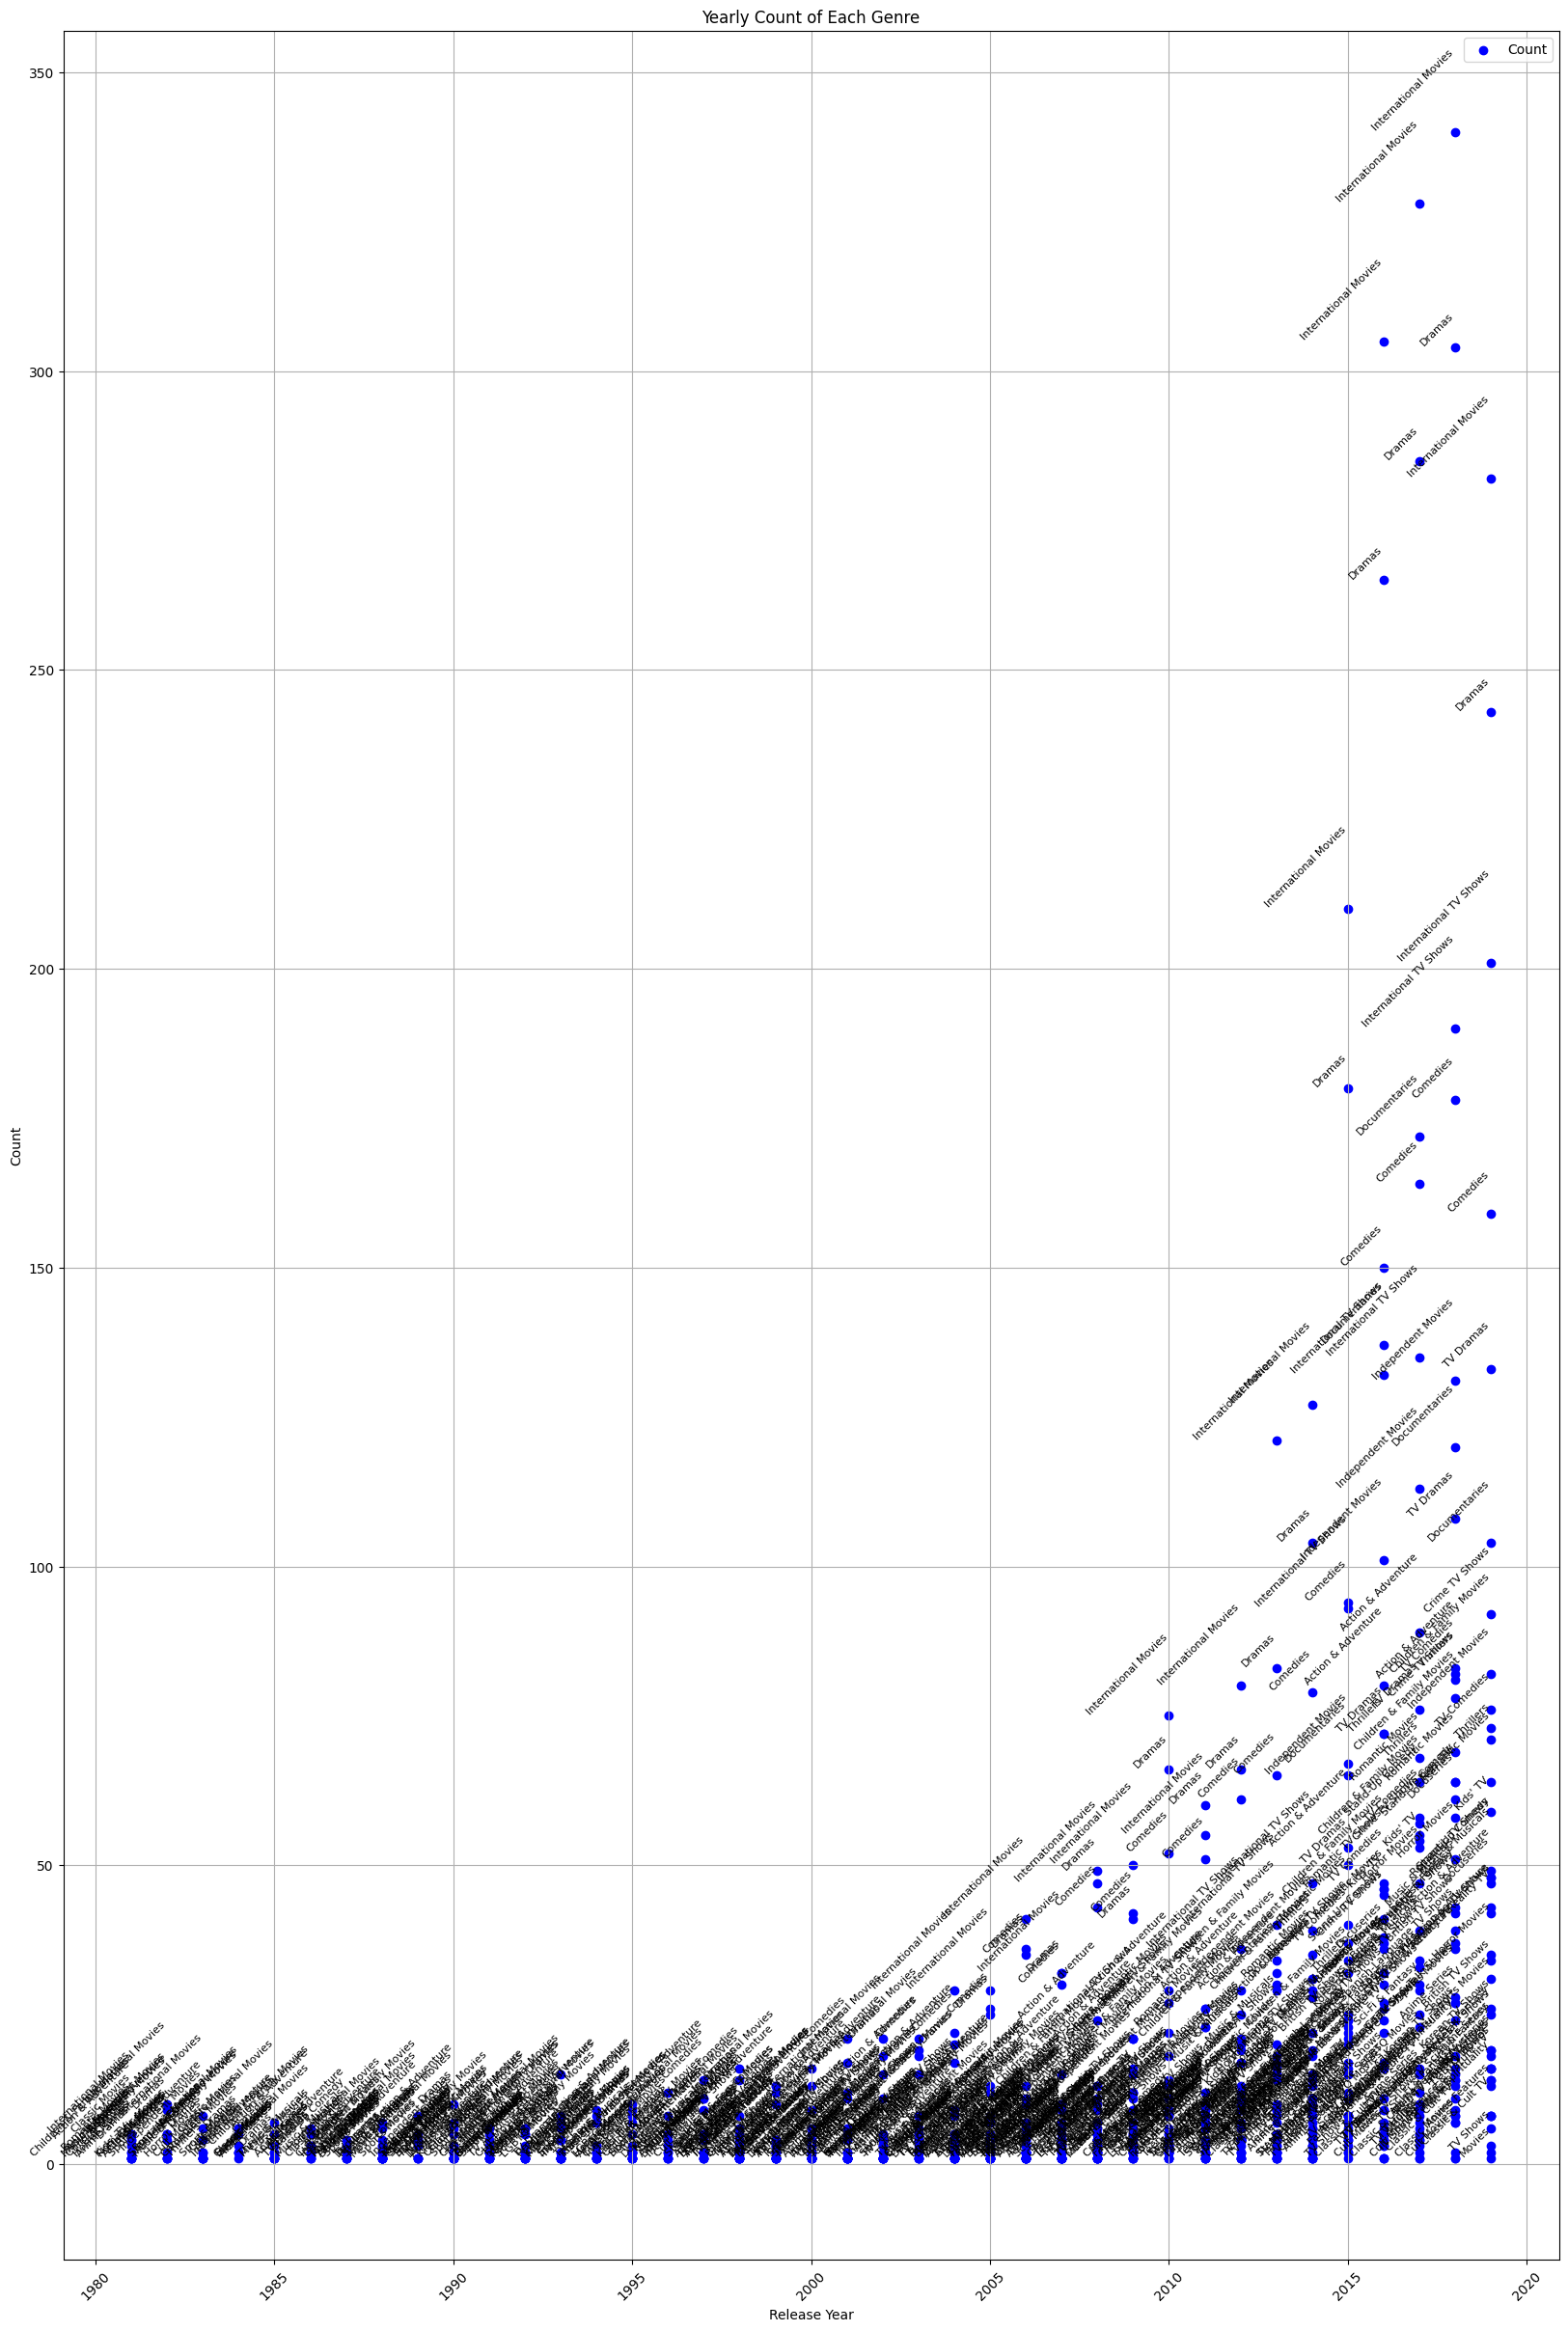

In [ ]:
df_diversity = df.copy()
df_diversity = df_diversity.explode('listed_in')
df_diversity = df_diversity[(df_diversity['release_year'] > 1980) & (df_diversity['release_year'] < 2020)].groupby('release_year')['listed_in'].value_counts()
pd.DataFrame(df_diversity)
x = []
y = []
genres = []

for year, count in df_diversity.items():
    x.append(year[0])
    y.append(count)
    genres.append(year[1])

plt.figure(figsize=(20, 30))
plt.scatter(x, y, marker='o', color='b', label='Count')

for x, y, genre in zip(x, y, genres):
    plt.text(x, y, genre, fontsize=8, ha='right', va='bottom', rotation=45)

plt.title('Yearly Count of Each Genre')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend()

plt.show()


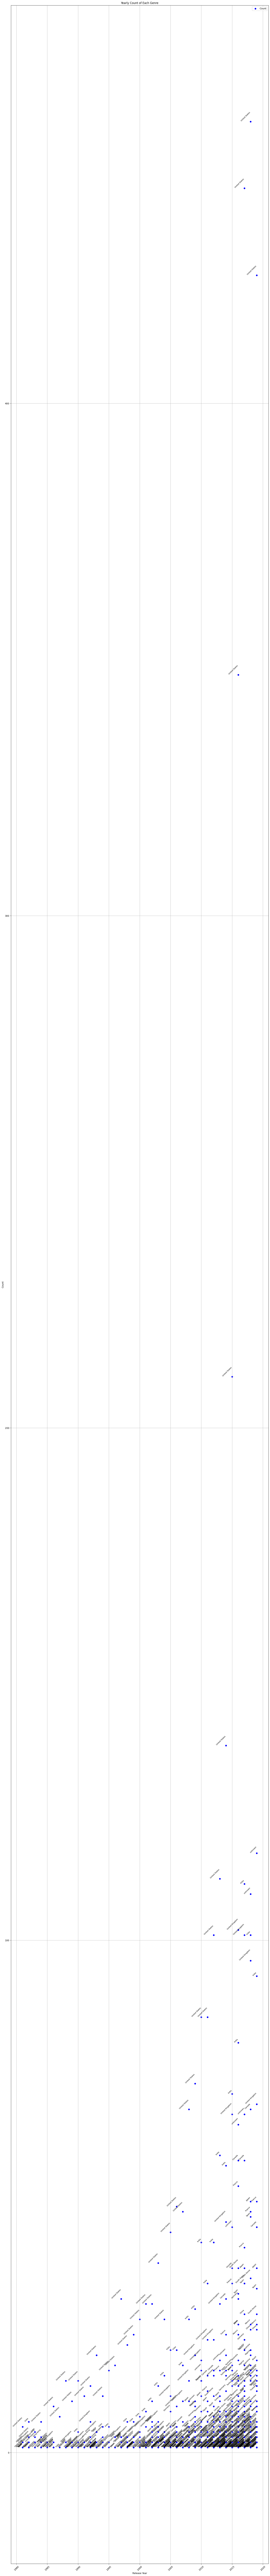

In [ ]:
df_diversity = df.copy()
df_diversity = df_diversity.explode('country')
df_diversity = df_diversity[(df_diversity['release_year'] > 1980) & (df_diversity['release_year'] < 2020)].groupby('release_year')['country'].value_counts()
pd.DataFrame(df_diversity)
x = []
y = []
genres = []

for year, count in df_diversity.items():
    x.append(year[0])
    y.append(count)
    genres.append(year[1])

plt.figure(figsize=(20, 200))
plt.scatter(x, y, marker='o', color='b', label='Count')

for x, y, genre in zip(x, y, genres):
    plt.text(x, y, genre, fontsize=8, ha='right', va='bottom', rotation=45)

plt.title('Yearly Count of Each Genre')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend()

plt.show()


20. Explore whether there is a correlation between the age of content (based on release year) and its current popularity or rating. Does older content remain relevant and well-rated over time?

In [ ]:
df

<ipython-input-192-d9b50136563a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='release_year', y='audience_category', inner='box', palette='Dark2')


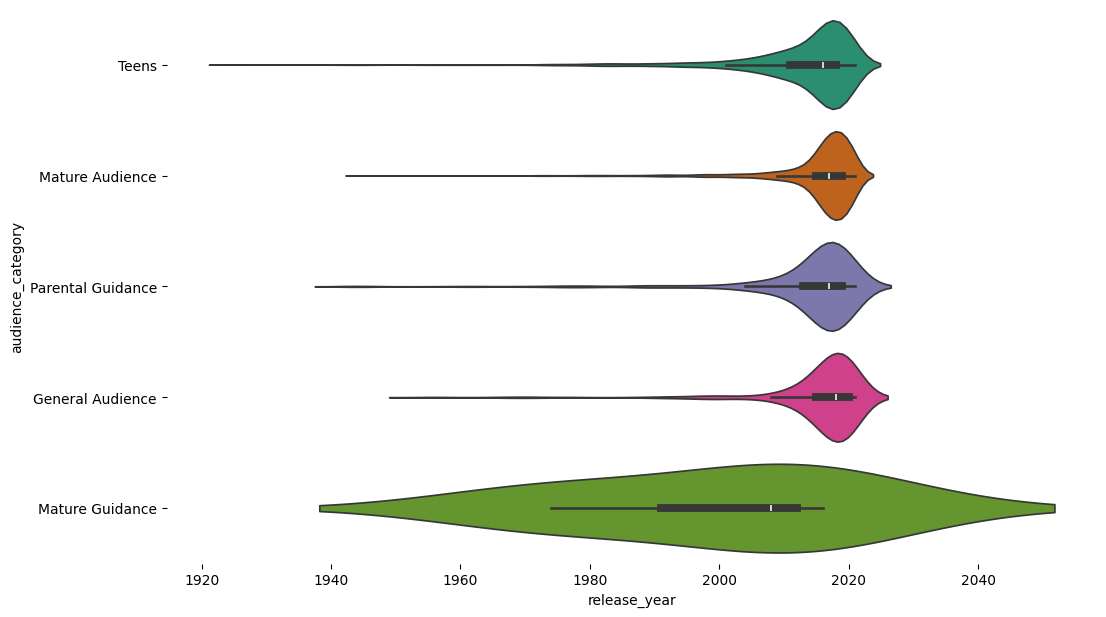

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['audience_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='release_year', y='audience_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

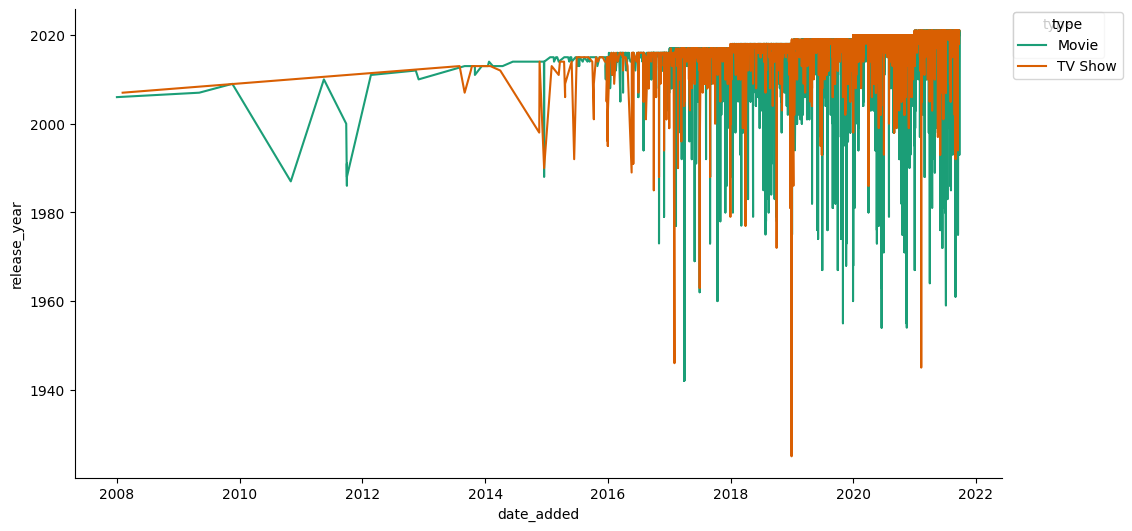

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')